Below is the code to fill the GDP missing months 

Don't run this shell, its just for demonstration that I used this code to fill the missing value of some data sets. 

In [54]:
# # Convert DATE column to datetime
# df_total_houses['DATE'] = pd.to_datetime(df_total_houses['DATE'])

# # Create a complete date range from the minimum to the maximum date
# full_date_range = pd.date_range(start=df_total_houses['DATE'].min(), end='2024-01-01', freq='MS')

# # Create a new DataFrame with the full date range
# full_df = pd.DataFrame({'DATE': full_date_range})

# # Merge the original DataFrame with the full date range DataFrame
# merged_df = pd.merge(full_df, df_total_houses, on='DATE', how='left')


# # Fill in the missing values with the average of the upper and lower values
# for i in range(1, len(merged_df) - 1):
#     if pd.isna(merged_df.loc[i, 'ETOTALUSQ176N']):
#         upper_value = merged_df.loc[i - 1, 'ETOTALUSQ176N']
#         lower_value = merged_df.loc[i + 1, 'ETOTALUSQ176N']
#         merged_df.loc[i, 'ETOTALUSQ176N'] = (upper_value + lower_value) / 2

# # Forward fill the first missing value and backward fill the last missing value
# merged_df['ETOTALUSQ176N'].fillna(method='ffill', inplace=True)
# merged_df['ETOTALUSQ176N'].fillna(method='bfill', inplace=True)

# print(merged_df)
# # merged_df.to_csv('ETOTALUSQ176N.csv')
        

Start from here:  

In [35]:
#importing all the importatnt libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [3]:
#Loading all the data I have downloaded from different different sources

df_price_index = pd.read_csv('CSUSHPISA.csv')  
df_gdp = pd.read_csv('GDP.csv')
df_population = pd.read_csv('POPTHM.csv')
df_gdp_per_capita = pd.read_csv('GDP_per_capita.csv')
df_cpi = pd.read_csv('CPIAUCSL.csv')
df_unemployment = pd.read_csv('UNRATE.csv')
df_fed_rate = pd.read_csv('FEDFUNDS.csv')
df_mortgage = pd.read_csv('MORTGAGE30US.csv')
df_total_houses = pd.read_csv('ETOTALUSQ176N.csv')
df_cci = pd.read_csv('CCI.csv')
df_stikcy = pd.read_csv('CORESTICKM159SFRBATL.csv')
df_monthly_supply = pd.read_csv('MSACSR.csv')





In [20]:
# Creating a list of DataFrames and their labels
data_frames = [
    (df_price_index, 'Index Jan 2000=100', 'S&P Case-Schiller Home Price Index'),
    (df_gdp, 'Billions of Dollars', 'GDP'),
    (df_population, 'Thousands', 'POPTHM (Population)'),
    (df_gdp_per_capita, 'Dollars', 'GDP per Capita'),
    (df_cpi, 'Index 1982-1984=100', 'CPIAUCSL (Inflation)'),
    (df_unemployment, 'Percent', 'UNRATE (Unemployment Rate)'),
    (df_fed_rate, 'Percent', 'FEDFUNDS (Federal Funds Effective Rate)'),
    (df_mortgage, 'Percent', 'MORTGAGE30US (Fixed Rate Mortgage Average)'),
    (df_total_houses, 'Thousands of Units', 'ETOTALUSQ176N (Housing Inventory Estimate)'),
    (df_cci, 'benchmarked at 100,', 'Consumer Confidence Index'),
    (df_stikcy, 'Percent Change', 'Sticky Price Consumer Price Index less Food and Energy'),
    (df_monthly_supply, 'Months Supply','Monthly Supply of New Houses in the United States' )
]

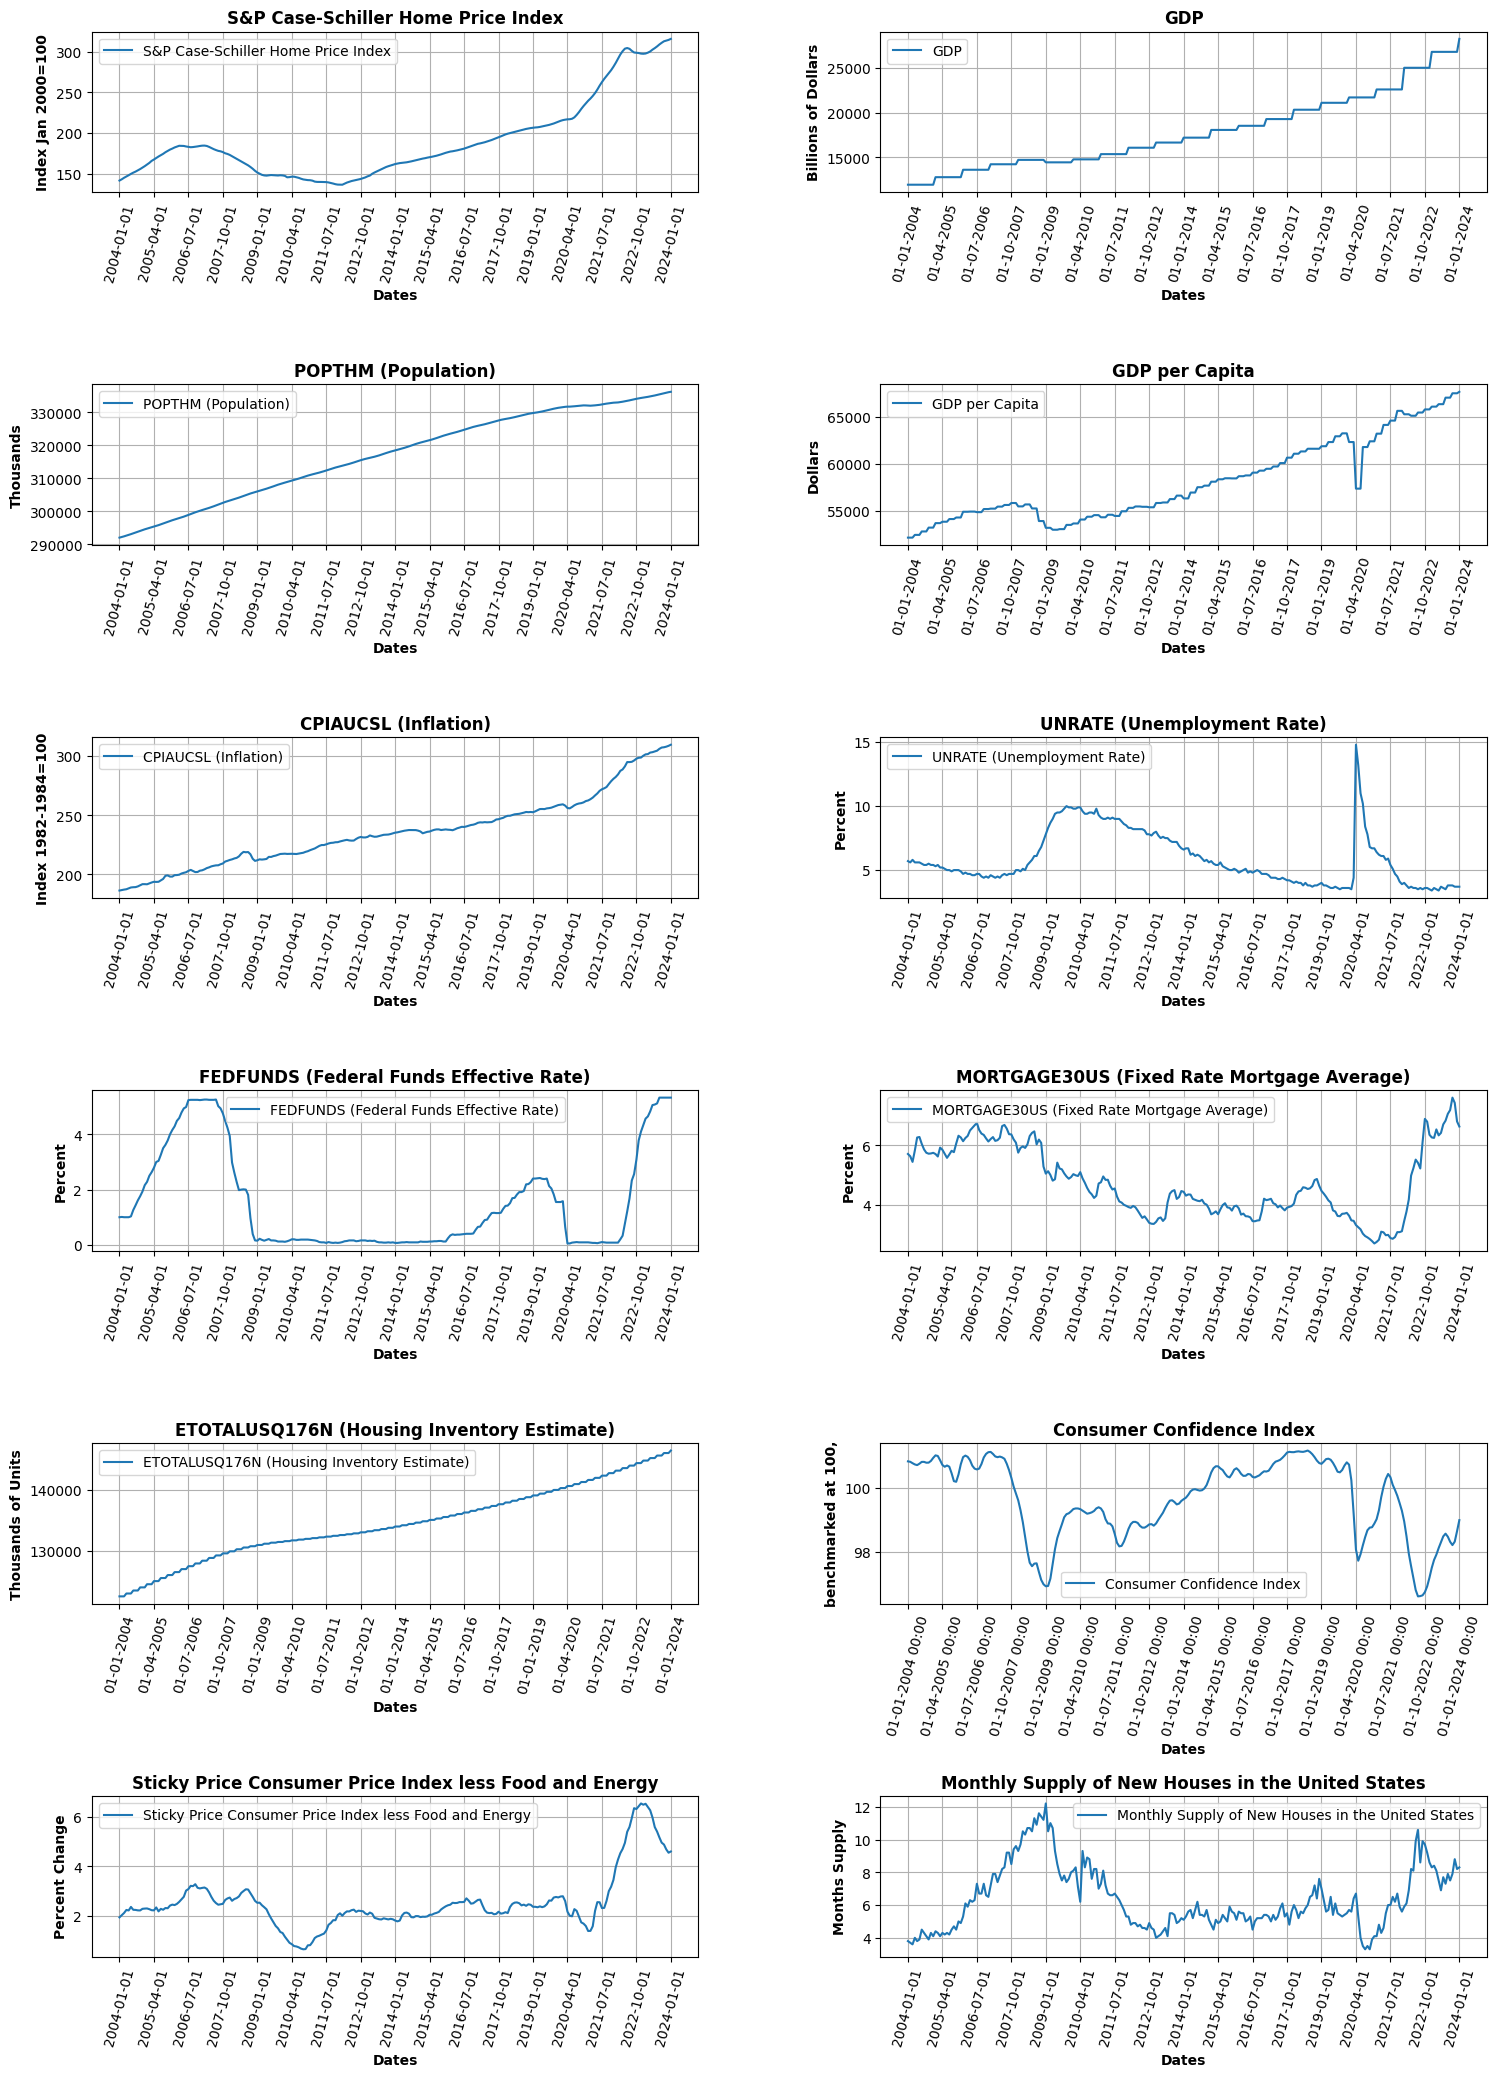

In [42]:
plt.figure(figsize=(18, 25))  # Set the figure size

for i, (df, y_label, title) in enumerate(data_frames):
    plt.subplot(6, 2, i + 1)  # Create a subplot grid with 6 rows and 2 columns
    plt.plot(df.iloc[:, 0], df.iloc[:, 1], label=title, linewidth=1.5)  # Plot the data with a label and line width
    plt.ylabel(y_label, fontweight='bold')  # Set the y-axis label with bold font
    plt.title(title, fontweight='bold')  # Set the title with bold font
    
    # Marking specific dates
    dates = pd.to_datetime(df.iloc[:, 0])  # Convert the dates column to datetime format
    values = df.iloc[:, 1]  # Extract the values column
    
    plt.grid(True)  # Enable the grid
    plt.legend()  # Display the legend
    
    plt.gca().xaxis.set_major_locator(MultipleLocator(15))  # Set major locator for x-axis
    plt.gca().tick_params(axis='x', rotation=75)  # Rotate the x-axis labels
    
    plt.xlabel('Dates', fontweight='bold')  # Set the x-axis label with bold font

plt.subplots_adjust(hspace=1.2, wspace=0.3)  # Adjust space between plots
plt.show()  # Display the figure


In [44]:
# Initialize a dictionary to hold correlation results
correlation_results = {}

# Extract the values from df_price_index
price_index_values = df_price_index.iloc[:, 1]

# Iterate through each DataFrame in the list
for df, _, label in data_frames:
    # Extract the values from the current DataFrame
    other_values = df.iloc[:, 1]
    
    # Calculate the correlation
    correlation = price_index_values.corr(other_values)
    
    # Store the result
    correlation_results[label] = correlation

# Print the correlation results
for label, corr in correlation_results.items():
    print(f'Correlation between df_price_index and {label}: {corr:.4f}')


Correlation between df_price_index and S&P Case-Schiller Home Price Index: 1.0000
Correlation between df_price_index and GDP: 0.8829
Correlation between df_price_index and POPTHM (Population): 0.6895
Correlation between df_price_index and GDP per Capita: 0.9138
Correlation between df_price_index and CPIAUCSL (Inflation): 0.8545
Correlation between df_price_index and UNRATE (Unemployment Rate): -0.5628
Correlation between df_price_index and FEDFUNDS (Federal Funds Effective Rate): 0.3693
Correlation between df_price_index and MORTGAGE30US (Fixed Rate Mortgage Average): 0.1143
Correlation between df_price_index and ETOTALUSQ176N (Housing Inventory Estimate): 0.7952
Correlation between df_price_index and Consumer Confidence Index: -0.2530
Correlation between df_price_index and Sticky Price Consumer Price Index less Food and Energy: 0.7936
Correlation between df_price_index and Monthly Supply of New Houses in the United States: 0.1580


The key factors affecting the US Home Price Index are:

1. GDP per Capita (0.9138)
2. CPIAUCSL (Inflation) (0.8545)
3. ETOTALUSQ176N (Housing Inventory Estimate) (0.7952)
4. Sticky Price CPI less Food and Energy (0.7936)
5. Population (0.6895)

I will use these factors, excluding GDP as it’s part of GDP per Capita, and the S&P Case-Schiller Index since it duplicates the Home Price Index.

In [51]:
# Define the target variable
Y = df_price_index.iloc[:, 1]  # Extract the Home Price Index

# Extract columns of interest from different dataframes
gdp_column = df_gdp_per_capita.iloc[:, 1]  # GDP per Capita
cpi_column = df_cpi.iloc[:, 1]  # CPI
unemploy_column = df_unemployment.iloc[:, 1]  # Unemployment Rate
total_column = df_total_houses.iloc[:, 1]  # Housing Inventory Estimate
cci = df_cci.iloc[:, 1]  # Consumer Confidence Index
mon_sup = df_monthly_supply.iloc[:, 1]  # Monthly Supply of New Houses
infla = df_stikcy.iloc[:, 1]  # Sticky Price CPI less Food and Energy
pop = df_population.iloc[:, 1]  # Population

# Merge dataframes based on index alignment
X = pd.merge(pop, infla, left_index=True, right_index=True)  # Merge Population and Inflation
X = pd.merge(X, total_column, left_index=True, right_index=True)  # Add Housing Inventory Estimate
X = pd.merge(X, gdp_column, left_index=True, right_index=True)  # Add GDP per Capita
X = pd.merge(X, cpi_column, left_index=True, right_index=True)  # Add CPI

# Rename columns for clarity
X.rename(columns={'CORESTICKM159SFRBATL': 'inflation'}, inplace=True)
X.rename(columns={'OECD': 'Consumer Confidence index'}, inplace=True)
X.rename(columns={'MSACSR': 'Monthly supply'}, inplace=True)
X.rename(columns={'ETOTALUSQ176N': 'Total House Units'}, inplace=True)
X.rename(columns={'A939RX0Q048SBEA': 'GDP per Capita'}, inplace=True)

# Create a list of years, repeating each year 12 times
years = []
start_year = 2004
num_years = 20  # 20 years from 2004 to 2023

for year in range(start_year, start_year + num_years):
    years.extend([year] * 12)  # Add 12 entries for each year

years.append(2024)  # Add the year 2024

# Add the 'years' column to the dataframe X
X['years'] = years

# Print the merged dataframe X and the target variable Y
print(X)
print(Y)


       POPTHM  inflation  Total House Units  GDP per Capita  CPIAUCSL  years
0    292046.0   1.949813             122632           52179   186.300   2004
1    292230.0   2.037157             122632           52179   186.700   2004
2    292434.0   2.126567             122632           52179   187.100   2004
3    292651.0   2.247883             123099           52469   187.400   2004
4    292872.0   2.228612             123099           52469   188.200   2004
..        ...        ...                ...             ...       ...    ...
236  335612.0   4.959770             145558           67050   307.288   2023
237  335773.0   4.882928             145967           67513   307.531   2023
238  335925.0   4.688293             145967           67513   308.024   2023
239  336070.0   4.554396             145967           67513   308.742   2023
240  336194.0   4.603922             146375           67672   309.685   2024

[241 rows x 6 columns]
0      141.647
1      143.192
2      145.058
3      

In [52]:
# Load the dataset containing the OECD data
df_work_pop = pd.read_csv('Work_pop.csv')  # Read the CSV file into a DataFrame

# Convert the 'OECD' column to a list
oecd_list = df_work_pop['OECD'].tolist()

# Create a new list by repeating each element in 'oecd_list' 12 times
oecd_repeated = [value for value in oecd_list for _ in range(12)]

# Append a final value (64.5) to the end of the list
oecd_repeated.append(64.5)

# Add the 'oecd_repeated' list as a new column 'work_pop' to the dataframe X
X['work_pop'] = oecd_repeated

# Print the updated dataframe X to verify the new column
print(X)


       POPTHM  inflation  Total House Units  GDP per Capita  CPIAUCSL  years  \
0    292046.0   1.949813             122632           52179   186.300   2004   
1    292230.0   2.037157             122632           52179   186.700   2004   
2    292434.0   2.126567             122632           52179   187.100   2004   
3    292651.0   2.247883             123099           52469   187.400   2004   
4    292872.0   2.228612             123099           52469   188.200   2004   
..        ...        ...                ...             ...       ...    ...   
236  335612.0   4.959770             145558           67050   307.288   2023   
237  335773.0   4.882928             145967           67513   307.531   2023   
238  335925.0   4.688293             145967           67513   308.024   2023   
239  336070.0   4.554396             145967           67513   308.742   2023   
240  336194.0   4.603922             146375           67672   309.685   2024   

      work_pop  
0    66.582704  
1    

Linear Regression Model below:

Mean Squared Error: 3438.542835544837
R-squared: -1.8557760647226238
                   Coefficient
POPTHM               -0.001306
inflation             3.269305
Total House Units     0.007230
GDP per Capita        0.009979
CPIAUCSL             -1.279052
years                -3.824078
work_pop            -20.094093


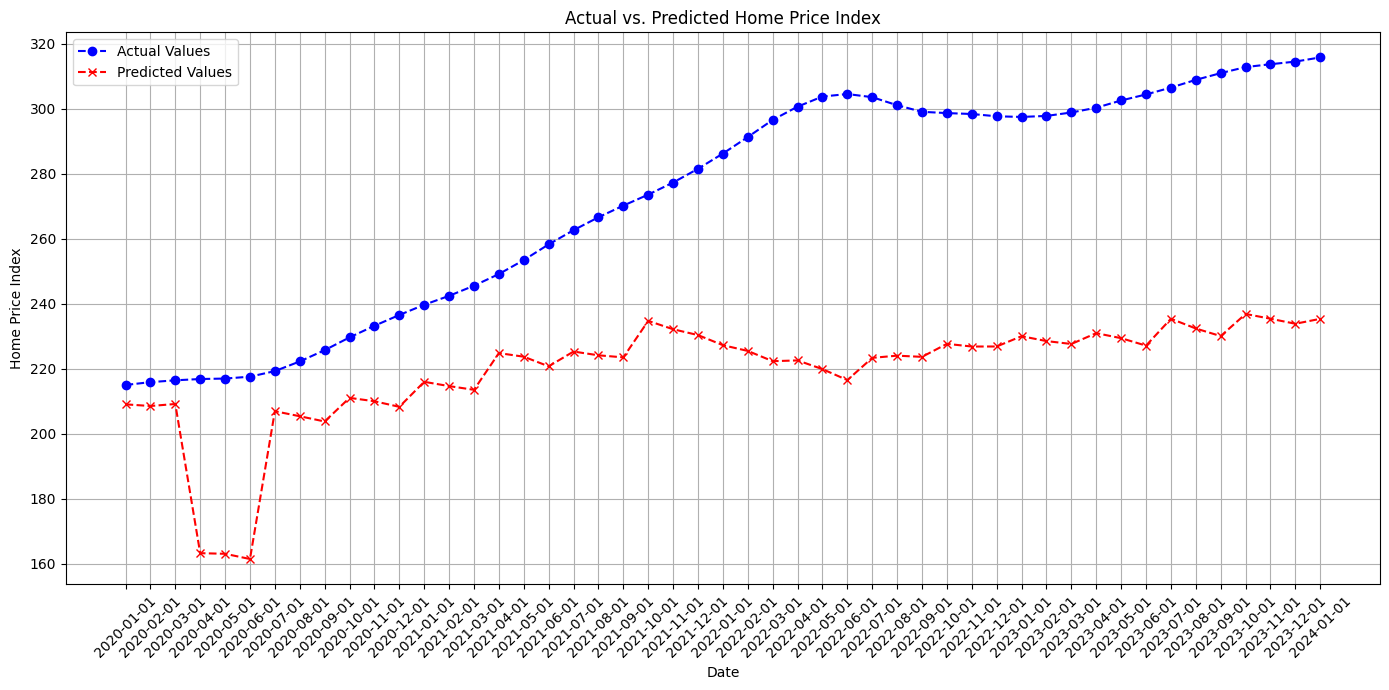

In [53]:
# Split the data into training and testing sets
split_index = int(0.8 * len(Y))  # Calculate the index for an 80-20 train-test split
X_train, X_test = X[:split_index], X[split_index:]  # Split features
y_train, y_test = Y[:split_index], Y[split_index:]  # Split target variable

# Initialize and fit the Linear Regression model
model = LinearRegression()  # Create a Linear Regression model instance
model.fit(X_train, y_train)  # Train the model on the training data

# Make predictions using the test data
y_pred = model.predict(X_test)  # Predict target values for the test set

# Evaluate the model's performance
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')  # Print the Mean Squared Error
print(f'R-squared: {r2_score(y_test, y_pred)}')  # Print the R-squared score

# Display the coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])  # Create a DataFrame of coefficients
print(coefficients)  # Print the coefficients

# Prepare the dates for plotting
dates = df_price_index['DATE']  # Extract the dates column from the original DataFrame

# Split the dates for training and testing
dates_train = dates[:split_index]  # Dates for the training set
dates_test = dates[split_index:]  # Dates for the testing set

# Plotting the predicted vs. actual values
plt.figure(figsize=(14, 7))  # Set the figure size
plt.plot(dates_test, y_test.values, label='Actual Values', color='blue', marker='o', linestyle='dashed')  # Plot actual values
plt.plot(dates_test, y_pred, label='Predicted Values', color='red', marker='x', linestyle='dashed')  # Plot predicted values
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Home Price Index')  # Label for y-axis
plt.title('Actual vs. Predicted Home Price Index')  # Title of the plot
plt.legend()  # Show the legend
plt.grid(True)  # Enable grid
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit the plot elements
plt.show()  # Display the plot


Linear Regression Model is Not Working Well

Using Ordinary Least Squares (OLS) Regression below: 

                            OLS Regression Results                            
Dep. Variable:              CSUSHPISA   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     504.6
Date:                Thu, 25 Jul 2024   Prob (F-statistic):          1.86e-116
Time:                        10:23:11   Log-Likelihood:                -570.53
No. Observations:                 192   AIC:                             1157.
Df Residuals:                     184   BIC:                             1183.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8358.0583   2745.03

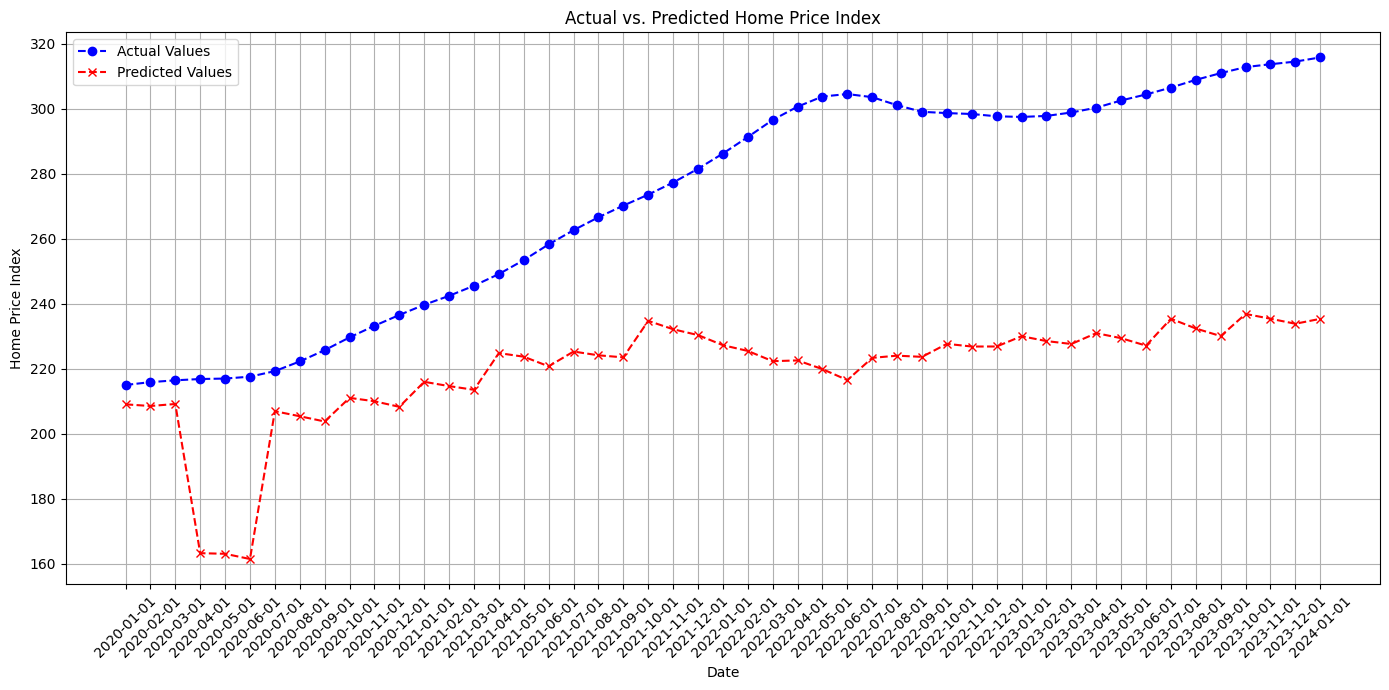

In [55]:
# Extract the dates column from the original DataFrame
dates = df_price_index['DATE']

# Split the data into training and testing sets
split_index = int(0.8 * len(Y))  # Calculate the index for an 80-20 train-test split
X_train, X_test = X[:split_index], X[split_index:]  # Split features into training and testing sets
y_train, y_test = Y[:split_index], Y[split_index:]  # Split target variable into training and testing sets
dates_test = dates[split_index:]  # Extract the test dates

# Add a constant term to the predictors for the regression model (intercept term)
X_train = sm.add_constant(X_train)  # Add a constant term to the training features
X_test = sm.add_constant(X_test)    # Add a constant term to the testing features

# Fit the Ordinary Least Squares (OLS) regression model
model = sm.OLS(y_train, X_train).fit()  # Train the OLS model with the training data

# Print the summary of the model to see detailed statistics
print(model.summary())  # Output the summary of the regression model

# Make predictions on the test set
y_pred = model.predict(X_test)  # Predict target values for the test set

# Evaluate the model's performance using Mean Squared Error
mse = np.mean((y_test - y_pred) ** 2)  # Calculate the Mean Squared Error
print(f'Mean Squared Error: {mse}')  # Print the Mean Squared Error

# Plotting the predicted vs. actual values with dates on the x-axis
plt.figure(figsize=(14, 7))  # Set the figure size
plt.plot(dates_test, y_test.values, label='Actual Values', color='blue', marker='o', linestyle='dashed')  # Plot actual values
plt.plot(dates_test, y_pred, label='Predicted Values', color='red', marker='x', linestyle='dashed')  # Plot predicted values
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Home Price Index')  # Label for y-axis
plt.title('Actual vs. Predicted Home Price Index')  # Title of the plot
plt.legend()  # Show the legend
plt.grid(True)  # Enable grid
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit the plot elements
plt.show()  # Display the plot


This model fits the data very well, explaining about 95% of the variation in home prices. The high R-squared value means it accurately predicts home prices based on the included factors. The model's significance and fit are strong, suggesting reliable results.